In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ruta_2004 = "C:/Users/Administrador/Desktop/Ivan/Individual_T104.dta"
ruta_2024 = "C:/Users/Administrador/Desktop/Ivan/usu_individual_T124.xlsx"

In [8]:
df_2004 = pd.read_stata(ruta_2004)
df_2024 = pd.read_excel(ruta_2024)

In [9]:
conteo_2004 = df_2004['ch04'].value_counts().sort_index()
conteo_2024 = df_2024['CH04'].value_counts().sort_index()


In [10]:
conteo_2004 = df_2004['ch04'].value_counts().sort_index()

In [11]:
etiquetas_sexo = {1: 'Varón', 2: 'Mujer'}
sexo_2004 = conteo_2004.rename(index=etiquetas_sexo)
sexo_2024 = conteo_2024.rename(index=etiquetas_sexo)

In [12]:
composicion = pd.DataFrame({
    '2004': sexo_2004,
    '2024': sexo_2024
})


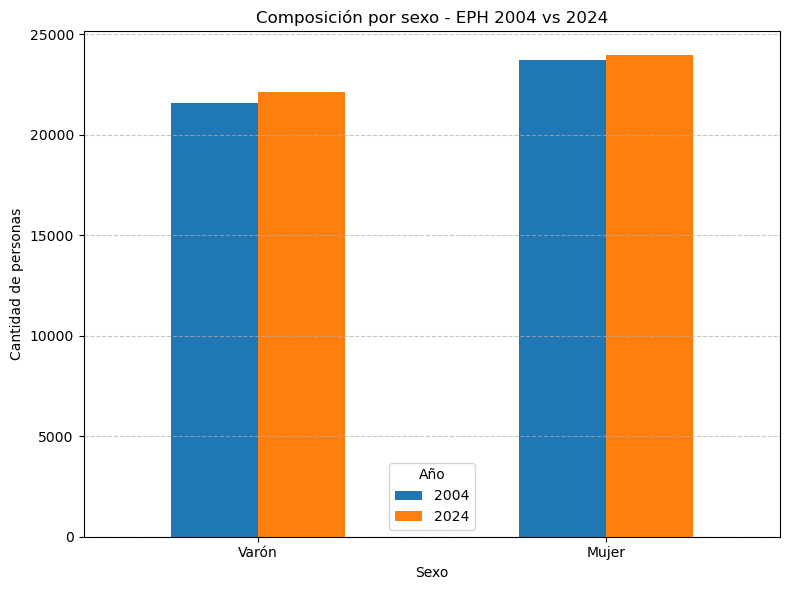

In [13]:
ax = composicion.plot(kind='bar', figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title("Composición por sexo - EPH 2004 vs 2024")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=0)
plt.legend(title="Año")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
df_2004.columns = df_2004.columns.str.upper()
df_2024.columns = df_2024.columns.str.upper()

In [15]:
variables = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

In [16]:
sub_2004 = df_2004[variables].copy()
sub_2024 = df_2024[variables].copy()

In [17]:
def convertir_a_numerico(df):
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            df[col] = df[col].astype('category').cat.codes
    return df

sub_2004 = convertir_a_numerico(sub_2004)
sub_2024 = convertir_a_numerico(sub_2024)

In [18]:
corr_2004 = sub_2004.corr()
corr_2024 = sub_2024.corr()


In [19]:
def graficar_matriz(corr, año):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title(f"Matriz de correlación - {año}")
    plt.tight_layout()
    plt.show()

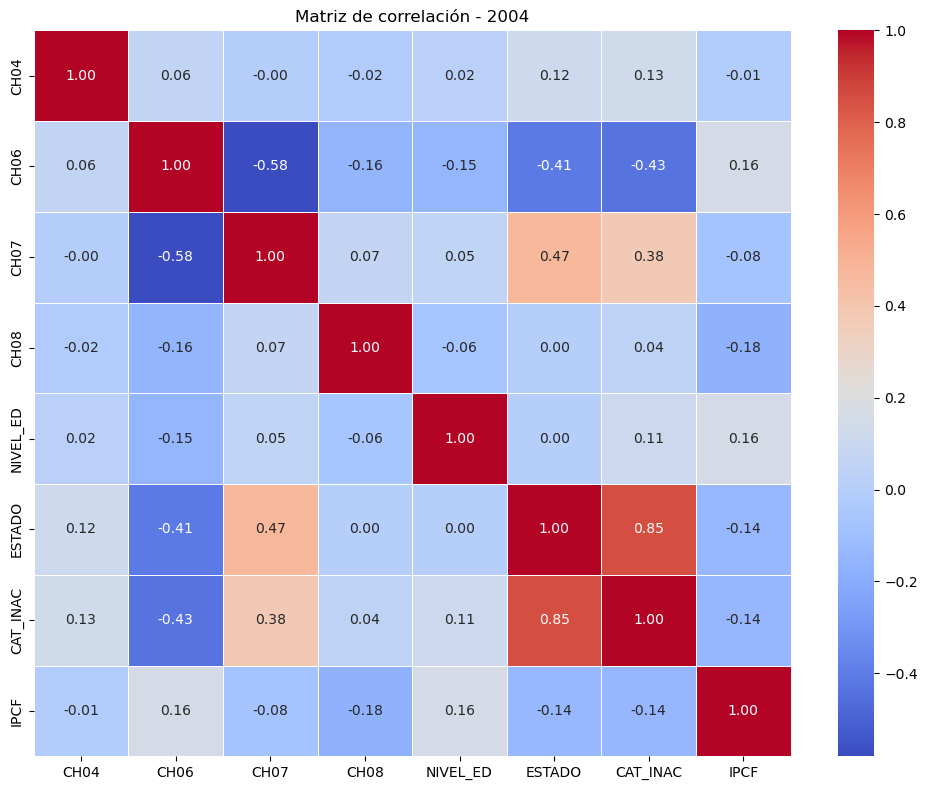

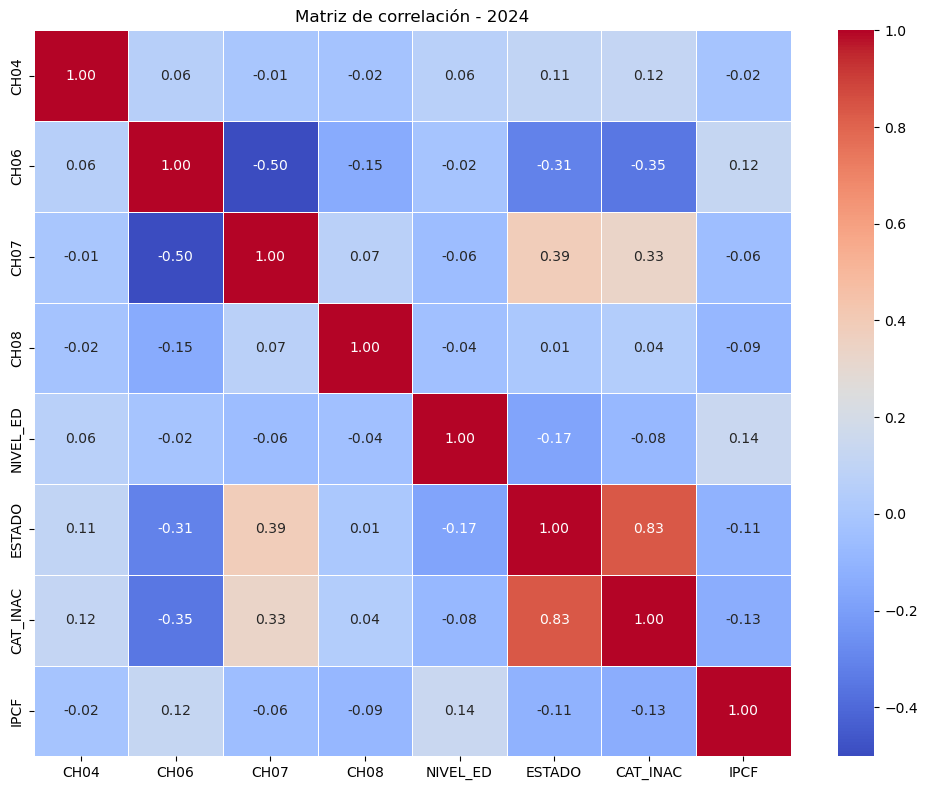

In [20]:
graficar_matriz(corr_2004, 2004)
graficar_matriz(corr_2024, 2024)